In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy

from src import inception_v3_imagenet
from src import imagenet_labels
from src import utils
from src.diff_renderer import make_render_op

In [69]:
from src.utils import angles_to_matrix

In [70]:
%matplotlib inline

In [71]:
width, height = 1000, 1000
mesh = utils.load_obj('resources/dog.obj')
original_texture = mesh.texture_image.copy()
render_op = make_render_op(mesh, width, height)

In [72]:
trans = [0, 0, 2.6]
rotation = [0.4, np.pi+.7, 2.9]
fscale = 0.4
bgcolor = [0.9, 0.9, 0.9]
texture_image = mesh.texture_image

In [73]:
view_matrix = np.hstack((angles_to_matrix(rotation) , np.reshape(trans, (3, 1)) )) 
view_matrix

array([[ 0.74262977,  0.02322123,  0.66929949,  0.        ],
       [-0.18298798, -0.95433222,  0.23614703,  0.        ],
       [ 0.64421769, -0.29784358, -0.70446631,  2.6       ]])

In [88]:
np.vstack((view_matrix, np.array([0, 0, 0, 1])))

array([[ 0.74262977,  0.02322123,  0.66929949,  0.        ],
       [-0.18298798, -0.95433222,  0.23614703,  0.        ],
       [ 0.64421769, -0.29784358, -0.70446631,  2.6       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [15]:
# f = focal length, fx and fy should be the same
fmat = [float(width) / float(fscale), float(width) / float(fscale)]

# c = center of screen, should be [w/2, h/2]
C = [width/2.,height/2.]

camera_matrix = np.array([[fmat[0], 0, C[0]],[0., fmat[1], C[1]],[0.,0.,1.]], dtype=np.float64)
camera_matrix

array([[  2.50000000e+03,   0.00000000e+00,   5.00000000e+02],
       [  0.00000000e+00,   2.50000000e+03,   5.00000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [10]:
np.reshape(trans, (3, 1))

array([[ 0. ],
       [ 0. ],
       [ 2.6]])

In [ ]:
U.view_mtx

In [18]:
# concat the rotation/rodriguez matrix  with the translation matrix
# https://docs.opencv.org/2.4.13.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html

abnormal = camera_matrix.dot(view_matrix).dot(np.hstack((mesh.v[0,:], 1)))
abnormal / abnormal[2]

array([ 364.08742211,  458.6235996 ,    1.        ])

array([[  2.50000000e+03,   0.00000000e+00,   5.00000000e+02],
       [  0.00000000e+00,   2.50000000e+03,   5.00000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [25]:
mesh.v.shape

(1338, 3)

In [28]:
homo_v = np.hstack((mesh.v, np.ones((mesh.v.shape[0], 1) )))
homo_v

array([[ 0.04729923, -0.02962504, -0.28196972,  1.        ],
       [ 0.03527478,  0.01396127, -0.29956182,  1.        ],
       [ 0.06153678,  0.01350783, -0.29312388,  1.        ],
       ..., 
       [ 0.04403177,  0.2615302 ,  0.38719011,  1.        ],
       [ 0.03651725,  0.24862289,  0.39145738,  1.        ],
       [ 0.03867221,  0.26496691,  0.38782987,  1.        ]])

In [37]:
def unhomo(x):
    return x / x[2]

In [38]:
proj_matrix = camera_matrix.dot(view_matrix)

unhomo(proj_matrix.dot(homo_v[0,:]))

array([ 364.08742211,  458.6235996 ,    1.        ])

In [39]:
homo_v.shape

(1338, 4)

In [46]:
homo_v.reshape((-1, 1, 4))

array([[[ 0.04729923, -0.02962504, -0.28196972,  1.        ]],

       [[ 0.03527478,  0.01396127, -0.29956182,  1.        ]],

       [[ 0.06153678,  0.01350783, -0.29312388,  1.        ]],

       ..., 
       [[ 0.04403177,  0.2615302 ,  0.38719011,  1.        ]],

       [[ 0.03651725,  0.24862289,  0.39145738,  1.        ]],

       [[ 0.03867221,  0.26496691,  0.38782987,  1.        ]]])

In [76]:
abnormal = proj_matrix.dot(homo_v.reshape((-1, 4, 1)))[:, :, 0]
XY = (abnormal[0:2,:] / abnormal[2,:]).T
XY

array([[ 364.08742211,  458.6235996 ],
       [ 346.28885204,  420.02468568],
       [ 367.90214923,  417.86771948],
       ..., 
       [ 826.9936563 ,  317.56864249],
       [ 824.24418169,  333.41121454],
       [ 823.88321715,  314.8104699 ]])

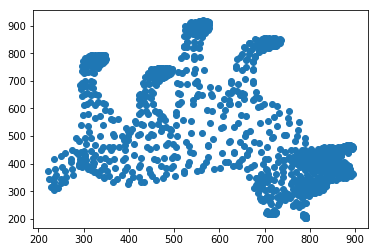

In [77]:
plt.scatter(XY[:,0], XY[:, 1])

In [87]:
camera_matrix.dot(mesh.v.reshape((-1, 3, 1)))[:, :, 0].T + trans

array([[ -22.7367874 , -215.0474512 ,    2.31803028],
       [ -61.59396297, -114.87774813,    2.30043818],
       [   7.28000332, -112.79237582,    2.30687612],
       ..., 
       [ 303.67448663,  847.42056112,    2.98719011],
       [ 287.02181223,  817.28592104,    2.99145738],
       [ 290.59545348,  856.33221676,    2.98782987]])

[0, 0, 2.6]